In [33]:
# 创建三维坐标轴对象Axes3D
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
df = pd.read_csv('dataset/test2.csv', delimiter=',')
df

x         y  mesh-x-velocity  mesh-y-velocity  viscosity-turb  \
0     0.078375  0.041875                0                0        0.004809   
1     0.078625  0.041875                0                0        0.004868   
2     0.078125  0.041875                0                0        0.004669   
3     0.078375  0.041625                0                0        0.040669   
4     0.078875  0.041875                0                0        0.004877   
...        ...       ...              ...              ...             ...   
7878  0.000374  0.000376                0                0        0.031381   
7879  0.000125  0.000625                0                0        0.002673   
7880  0.000375  0.000125                0                0        0.031810   
7881  0.000125  0.000375                0                0        0.003243   
7882  0.000125  0.000125                0                0        0.003452   

      x-coordinate  y-coordinate  
0         0.078375      0.041875  
1         0.078625      0.041875  
2         0.078125      0.041875  
3         0.078375      0.041625  
4         0.078875      0.041875  
...            ...           ...  
7878      0.000374      0.000376  
7879      0.000125      0.000625  
7880      0.000375      0.000125  
7881      0.000125      0.000375  
7882      0.000125      0.000125  

[7883 rows x 7 columns]

<IPython.core.display.Javascript object>


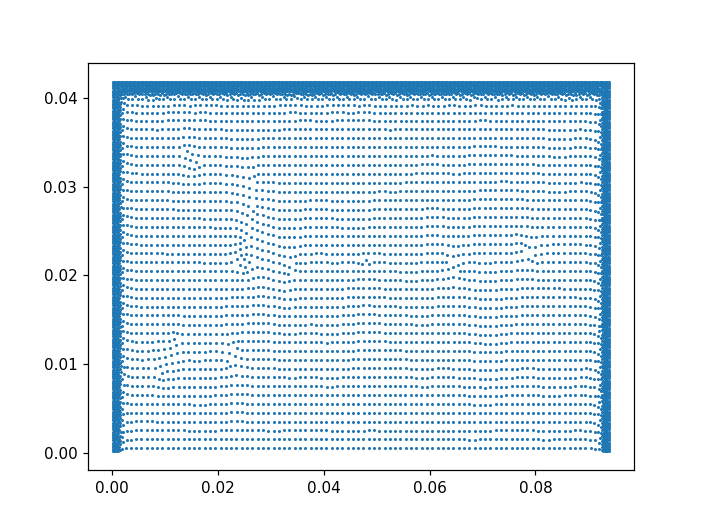

In [42]:
%matplotlib notebook
%config NotebookBackend.figure_format = 'svg'
# 定义坐标系
fig = plt.figure()
ax1 = plt.axes()
x = df["x"]
y = df["y"]
# z = df[" Z [ m ]"]
# ax1.scatter3D(x, y, z, c=z, cmap='Greens')
plt.scatter(x, y, s=1)
plt.show()

In [46]:
viscosity = df["viscosity-turb"]
x_min = min(x)
x_max = max(x)
y_min = min(y)
y_max = max(y)
x_range = x_max - x_min
y_range = y_max - y_min
x_min, x_max, y_min, y_max, x_range, y_range

(0.000122575, 0.09387733, 0.000123722, 0.041877162, 0.093754755, 0.04175344)

In [21]:
x2 = d2f[" X [ m ]"]
y2 = d2f[" Y [ m ]"]
z2 = d2f[" Z [ m ]"]

In [ ]:
x2_half = x2[:len(x2)//2]

C:\Users\kowuki\AppData\Local\Temp\ipykernel_29524\3470717555.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter3D(x2, y2, z2, cmap='Greens')


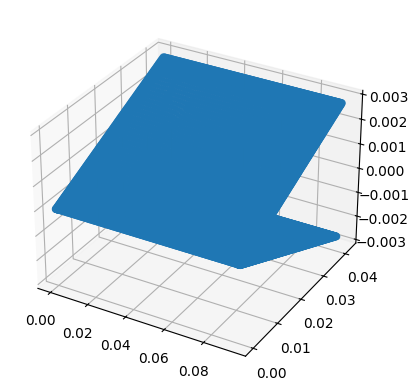

In [25]:
ax2 = plt.axes(projection='3d')
ax2.scatter3D(x2, y2, z2, cmap='Greens')
plt.draw()
plt.show()

In [58]:
import openpyxl as px
workbook = px.Workbook()
sheet = workbook.active
x_coords = np.arange(0, 0.095, 0.001)
y_coords = np.arange(0, 0.042, 0.001)
grid = np.meshgrid(x_coords, y_coords)
x_grid, y_grid = grid
len(x_grid), len(y_grid), grid

(42,
 42,
 [array([[0.   , 0.001, 0.002, ..., 0.092, 0.093, 0.094],
         [0.   , 0.001, 0.002, ..., 0.092, 0.093, 0.094],
         [0.   , 0.001, 0.002, ..., 0.092, 0.093, 0.094],
         ...,
         [0.   , 0.001, 0.002, ..., 0.092, 0.093, 0.094],
         [0.   , 0.001, 0.002, ..., 0.092, 0.093, 0.094],
         [0.   , 0.001, 0.002, ..., 0.092, 0.093, 0.094]]),
  array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
         [0.001, 0.001, 0.001, ..., 0.001, 0.001, 0.001],
         [0.002, 0.002, 0.002, ..., 0.002, 0.002, 0.002],
         ...,
         [0.039, 0.039, 0.039, ..., 0.039, 0.039, 0.039],
         [0.04 , 0.04 , 0.04 , ..., 0.04 , 0.04 , 0.04 ],
         [0.041, 0.041, 0.041, ..., 0.041, 0.041, 0.041]])])

In [59]:
total_xlen = sum(len(sub_array) for sub_array in x_grid)
combined_array = np.concatenate(x_grid)
combined_array, len(combined_array)

(array([0.   , 0.001, 0.002, ..., 0.092, 0.093, 0.094]), 3990)

In [60]:

points = []
for i in range(1, len(combined_array)+1):
    points.append("point-"+str(i))
    
data = [
    ['surface/point-surface'] * len(combined_array),
    points,
    np.concatenate(x_grid),
    np.concatenate(y_grid),    
]

In [62]:
# 写入数据
for i, column in enumerate(data):
    column_letter = px.utils.get_column_letter(i + 1)  # 获取列的字母标识
    for j, value in enumerate(column):
        sheet[column_letter + str(j + 1)] = value

# 保存Excel文件
workbook.save("example.xlsx")

<IPython.core.display.Javascript object>


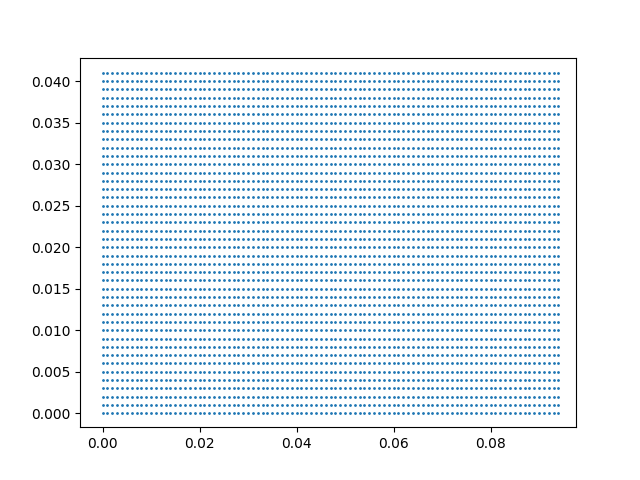

In [63]:
%matplotlib notebook
%config NotebookBackend.figure_format = 'svg'
# 定义坐标系
fig = plt.figure()
ax3 = plt.axes()
x = df["x"]
y = df["y"]
# z = df[" Z [ m ]"]
# ax1.scatter3D(x, y, z, c=z, cmap='Greens')
plt.scatter(np.concatenate(x_grid), np.concatenate(y_grid), s=1)
plt.show()

In [7]:
import os
import gzip

def extract_all_gz_files(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.gz'):
                file_path = os.path.join(root, file_name)
                output_file_path = os.path.splitext(file_path)[0]  # 去除.gz扩展名
                with gzip.open(file_path, 'rb') as gz_file:
                    with open(output_file_path, 'wb') as output_file:
                        output_file.write(gz_file.read())
                print(f"解压缩文件: {file_path}")

# 使用示例
folder_path = 'dataset/0116/'  # 替换为你的文件夹路径
extract_all_gz_files(folder_path)

解压缩文件: dataset/0116/FFF.2-29-00010.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00020.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00030.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00040.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00050.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00060.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00070.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00080.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00090.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00100.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00110.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00120.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00130.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00140.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00150.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00160.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00170.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00180.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00190.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00200.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00210.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00220.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00230.dat.gz
解压缩文件: dataset/0116/FFF.2-29-00240

In [8]:
import os
import gzip

def extract_all_gz_files(folder_path, encoding='utf-8'):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            if file_name.endswith('.gz'):
                file_path = os.path.join(root, file_name)
                output_file_path = os.path.splitext(file_path)[0]  # 去除.gz扩展名
                with gzip.open(file_path, 'rb') as gz_file:
                    with open(output_file_path, 'w', encoding=encoding) as output_file:
                        output_file.write(gz_file.read().decode(encoding))
                print(f"解压缩文件: {file_path}")

# 使用示例
folder_path = 'dataset/0116/'  # 替换为你的文件夹路径
extract_all_gz_files(folder_path, encoding='utf-8')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbf in position 3835: invalid start byte

In [2]:
with open("dataset/FFF-26-202401151805-0570", "r") as file:
    contents = file.read()
    print(contents)

cellnumber,    x-coordinate,    y-coordinate,velocity-magnitude, mesh-x-velocity, mesh-y-velocity,  velocity-angle,   vorticity-mag,  viscosity-turb,    x-coordinate,    y-coordinate
         1, 7.550000399E-02, 1.000000047E-03, 5.315773591E+00, 0.000000000E+00, 0.000000000E+00, 2.571241520E-03, 5.482830928E+02, 1.902251380E-02, 7.549999871E-02, 5.000000029E-04
         2, 7.499999553E-02, 5.000000237E-04, 5.315773591E+00, 0.000000000E+00, 0.000000000E+00, 2.571241520E-03, 5.482830928E+02, 1.902251380E-02, 7.549999871E-02, 5.000000029E-04
         3, 7.450000197E-02, 1.000000047E-03, 5.369925178E+00, 0.000000000E+00, 0.000000000E+00, 1.721665534E-03, 5.845259871E+02, 1.850443045E-02, 7.449999872E-02, 5.000000029E-04
         4, 7.400000095E-02, 5.000000237E-04, 5.369925178E+00, 0.000000000E+00, 0.000000000E+00, 1.721665534E-03, 5.845259871E+02, 1.850443045E-02, 7.449999872E-02, 5.000000029E-04
         5, 7.550000399E-02, 2.000000095E-03, 4.121583518E+00, 0.000000000E+00, 0.000000000E+

In [1]:
import pandas as pd
df = pd.read_table('dataset/FFF-26-202401151805-0570', header=None, sep='         |,', engine='python', skipinitialspace=True)
df.columns = df.iloc[0]
# df.columns = re.split(r'\s+', str(df.iloc[0]))
columns = str(df.columns).split(',')
# columns
df = df[1:]
df = df.iloc[:, :9]
df

0    cellnumber      x-coordinate      y-coordinate velocity-magnitude  \
1             1   7.550000399E-02   1.000000047E-03    5.315773591E+00   
2             2   7.499999553E-02   5.000000237E-04    5.315773591E+00   
3             3   7.450000197E-02   1.000000047E-03    5.369925178E+00   
4             4   7.400000095E-02   5.000000237E-04    5.369925178E+00   
5             5   7.550000399E-02   2.000000095E-03    4.121583518E+00   
...         ...               ...               ...                ...   
7756       7756   4.800000042E-02   2.449999936E-02    1.152455587E+00   
7757       7757   4.749999940E-02   2.400000021E-02    7.823712839E-01   
7758       7758   4.850000143E-02   2.500000037E-02    1.152455587E+00   
7759       7759   4.800000042E-02   2.349999920E-02    7.956655310E-01   
7760       7760   4.850000143E-02   2.400000021E-02    7.956655310E-01   

0      mesh-x-velocity   mesh-y-velocity    velocity-angle     vorticity-mag  \
1      0.000000000E+00   0.000000000E+00   2.571241520E-03   5.482830928E+02   
2      0.000000000E+00   0.000000000E+00   2.571241520E-03   5.482830928E+02   
3      0.000000000E+00   0.000000000E+00   1.721665534E-03   5.845259871E+02   
4      0.000000000E+00   0.000000000E+00   1.721665534E-03   5.845259871E+02   
5      0.000000000E+00   0.000000000E+00   4.500163031E-04   9.644175049E+02   
...                ...               ...               ...               ...   
7756   0.000000000E+00   0.000000000E+00   7.093045710E-01   2.341622504E+02   
7757   0.000000000E+00   0.000000000E+00  -1.693988080E-01   1.130826417E+03   
7758   0.000000000E+00   0.000000000E+00   7.093045710E-01   2.341622504E+02   
7759   0.000000000E+00   0.000000000E+00   1.092100532E+00   2.098623699E+02   
7760   0.000000000E+00   0.000000000E+00   1.092100532E+00   2.098623699E+02   

0       viscosity-turb  
1      1.902251380E-02  
2      1.902251380E-02  
3      1.850443045E-02  
4      1.850443045E-02  
5      1.500704475E-01  
...                ...  
7756   3.849118760E-03  
7757   5.295260597E-02  
7758   3.849118760E-03  
7759   8.195038317E-03  
7760   8.195038317E-03  

[7760 rows x 9 columns]

In [2]:
df.columns

Index(['cellnumber', '    x-coordinate', '    y-coordinate',
       'velocity-magnitude', ' mesh-x-velocity', ' mesh-y-velocity',
       '  velocity-angle', '   vorticity-mag', '  viscosity-turb'],
      dtype='object', name=0)

In [4]:
%matplotlib notebook
%config NotebookBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
fig = plt.figure()
x_grid = df['    x-coordinate'].astype(float)
y_grid = df['    y-coordinate'].astype(float)
plt.scatter(x_grid, y_grid, s=1)
plt.show()

<IPython.core.display.Javascript object>

In [39]:
# import re
# rows = re.split(r'\n|\t|,|              ', str(df.iloc[0:]))
# rows


KeyError: 0

In [24]:
newdf = []
for i in range(len(df)):
    # print("第", i, '行:', df.iloc[i])
    new

第 0 行: 0
cellnumber,    x-coordinate,    y-coordinate,velocity-magnitude, mesh-x-velocity, mesh-y-velocity,  velocity-angle,   vorticity-mag,  viscosity-turb,    x-coordinate,    y-coordinate             1, 7.550000399E-02, 1.000000047E-03, ...
Name: 1, dtype: object
第 1 行: 0
cellnumber,    x-coordinate,    y-coordinate,velocity-magnitude, mesh-x-velocity, mesh-y-velocity,  velocity-angle,   vorticity-mag,  viscosity-turb,    x-coordinate,    y-coordinate             2, 7.499999553E-02, 5.000000237E-04, ...
Name: 2, dtype: object
第 2 行: 0
cellnumber,    x-coordinate,    y-coordinate,velocity-magnitude, mesh-x-velocity, mesh-y-velocity,  velocity-angle,   vorticity-mag,  viscosity-turb,    x-coordinate,    y-coordinate             3, 7.450000197E-02, 1.000000047E-03, ...
Name: 3, dtype: object
第 3 行: 0
cellnumber,    x-coordinate,    y-coordinate,velocity-magnitude, mesh-x-velocity, mesh-y-velocity,  velocity-angle,   vorticity-mag,  viscosity-turb,    x-coordinate,    y-coordinate     

7760